In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import numpy as np
import random
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
#from matplotlib.ticker import percent
from scipy.stats import norm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style("darkgrid")

In [2]:
%matplotlib inline

8.066160082077282
0
8.066160082077282


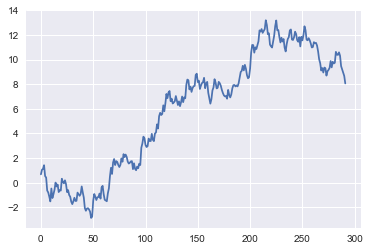

In [3]:
#### Reading in Euro/Dollar Exchange Quotes
sp = pd.read_csv("eurcsv.csv")

#Defining Dates and Closing Prices
close = sp['Price']
date = sp['Date']

def tester(date_in,price_in,technical):
    buys = []
    shorts = []
    rets = []
    s_rets = []
    benchmark = []
    date = pd.to_datetime(date_in)
    twenty_six = price_in.ewm(span=26).mean()
    twelve = price_in.ewm(span=12).mean()
    macd = twelve - twenty_six
    delta_macd = macd.pct_change(periods=2)

    for i in range(len(price_in)-1):
        if macd[i] > technical:
            buys.append(i)
    for i in buys:
        j = int(i)
        j1 = int(i+1)
        returns = ((price_in[j1] - price_in[j])/price_in[j])*100
        rets.append(returns)
    
#    plt.plot(np.cumsum(rets))
    total_return = np.cumsum(rets)
    end_return = total_return[-1]
    return end_return, rets
            
tester(date,close,0)


def random_walker(n):
    starter = [0]
    
    x_start, indicator = tester(date,close,starter[-1])
    print(x_start)

    for i in range(n):
        test_x = np.random.uniform(-1,1)/300
        random_return, indicator = tester(date,close,test_x)
        test_return, notimportant = tester(date,close,starter[-1])
        if random_return > test_return:
            starter.append(test_x)
    print(starter[-1])
    x,y = tester(date,close,starter[-1])
    print(x)
    plt.plot(np.cumsum(y))
            
            
         
random_walker(100)

In [4]:
#Reading in Euro/Dollar Exchange Quotes
sp = pd.read_csv("eurcsv.csv")

#Defining Dates and Closing Prices
close = sp['Price']
date = sp['Date']


def tester(date_in,price_in):
    buys = []
    shorts = []
    rets = []
    s_rets = []
    benchmark = []
    date = pd.to_datetime(date_in)
    twenty_six = price_in.ewm(span=26).mean()
    twelve = price_in.ewm(span=12).mean()
    macd = twelve - twenty_six
    delta_macd = macd.pct_change(periods=2)
    mix = []
    mix_port = []

    for i in range(len(price_in)-1):
        if macd[i] > 0.0 or delta_macd[i] < -.75:
            buys.append(i)
            mix.append(i)
        elif delta_macd[i] < -.15 or macd[i] < -.003:
            shorts.append(i)
            mix.append(i)
    for i in buys:
        j = int(i)
        j1 = int(i+1)
        returns = ((price_in[j1] - price_in[j])/price_in[j])*100
        rets.append(returns)
    for i in shorts:
        s = int(i)
        s1 = int(i+1)
        s_returns = ((price_in[s1] - price_in[s])/price_in[s])*-100
        s_rets.append(s_returns)
#    for i in mix:
#        j = int(i)
#        j1 = int(i+1)
#        mix_return = ((price_in[j1] - price_in[j])/price_in[j])*100
#        mix_port.append(mix_return)        
        
    for i in range(len(price_in)-1):
        z = int(i)
        z1 = int(i+1)
        base = ((price_in[z1] - price_in[z])/price_in[z])*100
        benchmark.append(base)
    x_bench = np.linspace(0,1,len(benchmark))
    x_strat = np.linspace(0,1,len(rets))   
    x_short = np.linspace(0,1,len(s_rets))
    fig, ax = plt.subplots(figsize=(12,5))

    ax.plot(x_strat, np.cumsum(rets),label="Long Strategy")
    ax.plot(x_bench, np.cumsum(benchmark),label="Benchmark")
    ax.plot(x_short, np.cumsum(s_rets),label="Short Strategy")
#    ax2 = ax.twinx()
#    ax2.plot(np.linspace(0,1,len(macd)), macd, 'r')
    #ax.yaxis.set_major_formatter(PercentFormatter())    
    ax.legend(fontsize=15)
    print("Strategy Return = %",sum(rets))
    print("Total Return Outright = %",sum(benchmark))
    
    #RISK ASSESMENT BENCHMARK
    delta_returns = price_in.pct_change()
    mean_returns = np.mean(delta_returns)
    std_returns = np.std(delta_returns)
    VAR_95 = norm.ppf(1-0.95,mean_returns, std_returns)*100
    print("Benchmark VAR @ confidence Level = 95% Level", VAR_95)
    
    #RISK ASSESMENT STRATEGY
    #delta_returns_strat = price_in.pct_change()
    mean_returns_strat = np.mean(rets)
    std_returns_strat = np.std(rets)
    VAR_95_strat = norm.ppf(1-0.95,mean_returns_strat, std_returns_strat)
    print("Strategy VAR @ confidence Level = 95% Level", VAR_95_strat)
    

Strategy Return = % 5.218973611303951
Total Return Outright = % 3.4985782907569263
Benchmark VAR @ confidence Level = 95% Level -0.7523059905504526
Strategy VAR @ confidence Level = 95% Level -0.7339464424068664


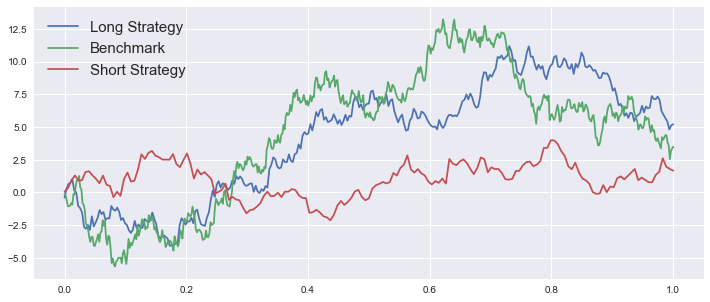

In [5]:
tester(date,close)

NameError: name 'macd' is not defined

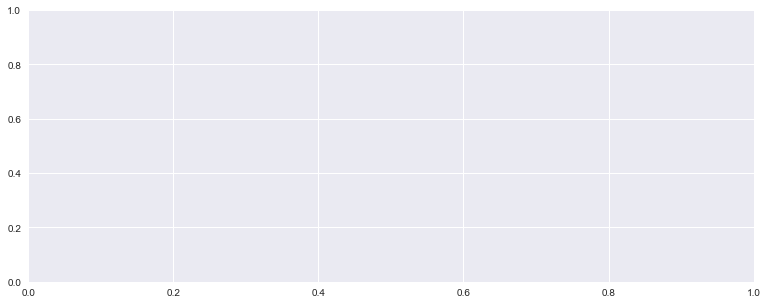

In [6]:
date = pd.to_datetime(sp['Date'])
fig, ax1 = plt.subplots(figsize=(13,5))
ax1.plot(date, macd, 'b-')
ax2 = ax1.twinx()
ax2.plot(date, close, 'r')
ax2.set_ylabel(color='r')
ax2.tick_params('y', colors='r')
fig.tight_layout()

# Short Term Moving Average and Long Term Moving Average Formulas (Currency)

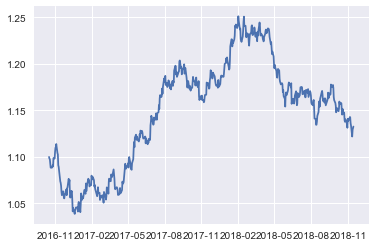

In [40]:
#Reading in Euro/Dollar Exchange Quotes
sp = pd.read_csv("eurcsv.csv")

#Defining Dates and Closing Prices
close = sp['Price']
date = sp['Date']
date = pd.to_datetime(date)

plt.plot(date,close)

In [37]:
#Reading in Euro/Dollar Exchange Quotes
sp = pd.read_csv("eurcsv.csv")

#Defining Dates and Closing Prices
close = sp['Price']
date = sp['Date']


def tester(date_in,price_in):
    buys = []
    shorts = []
    rets = []
    s_rets = []
    benchmark = []
    date = pd.to_datetime(date_in)
    LMA = price_in.rolling(window=100).mean()
    SMA = price_in.rolling(window=20).mean()
    diff = SMA - LMA
    #delta_macd = macd.pct_change(periods=2)
    mix = []
    mix_port = []
    
    plt.plot(date, price_in)
    plt.plot(date, LMA)
    plt.plot(date, SMA)

    for i in range(len(price_in)-1):
        if diff[i] > 0.0:
            buys.append(i)
            mix.append(i)
            
    for i in range(len(price_in)-1):
        if diff[i] < 0.0:
            shorts.append(i)
            mix.append(i)

    for i in buys:
        j = int(i)
        j1 = int(i+1)
        returns = ((price_in[j1] - price_in[j])/price_in[j])*100
        rets.append(returns)
    for i in shorts:
        s = int(i)
        s1 = int(i+1)
        s_returns = ((price_in[s1] - price_in[s])/price_in[s])*-100
        s_rets.append(s_returns)
#    for i in mix:
#        j = int(i)
#        j1 = int(i+1)
#        mix_return = ((price_in[j1] - price_in[j])/price_in[j])*100
#        mix_port.append(mix_return)        
        
    for i in range(len(price_in)-1):
        z = int(i)
        z1 = int(i+1)
        base = ((price_in[z1] - price_in[z])/price_in[z])*100
        benchmark.append(base)
    x_bench = np.linspace(0,1,len(benchmark))
    x_strat = np.linspace(0,1,len(rets))   
    x_short = np.linspace(0,1,len(s_rets))
    fig, ax = plt.subplots(figsize=(12,5))

    ax.plot(x_strat, np.cumsum(rets),label="Long Strategy")
    ax.plot(x_bench, np.cumsum(benchmark),label="Benchmark")
    ax.plot(x_short, np.cumsum(s_rets),label="Short Strategy")
#    ax2 = ax.twinx()
#    ax2.plot(np.linspace(0,1,len(macd)), macd, 'r')
    #ax.yaxis.set_major_formatter(PercentFormatter())    
    ax.legend(fontsize=15)
    print("Strategy Return = %",sum(rets))
    print("Total Return Outright = %",sum(benchmark))
    
    #RISK ASSESMENT BENCHMARK
    delta_returns = price_in.pct_change()
    mean_returns = np.mean(delta_returns)
    std_returns = np.std(delta_returns)
    VAR_95 = norm.ppf(1-0.95,mean_returns, std_returns)*100
    print("Benchmark VAR @ confidence Level = 95% Level", VAR_95)
    
    #RISK ASSESMENT STRATEGY
    #delta_returns_strat = price_in.pct_change()
    mean_returns_strat = np.mean(rets)
    std_returns_strat = np.std(rets)
    VAR_95_strat = norm.ppf(1-0.95,mean_returns_strat, std_returns_strat)
    print("Strategy VAR @ confidence Level = 95% Level", VAR_95_strat)
    

Strategy Return = % 6.770802842122835
Total Return Outright = % 3.4985782907569263
Benchmark VAR @ confidence Level = 95% Level -0.7523059905504526
Strategy VAR @ confidence Level = 95% Level -0.7136002958794047


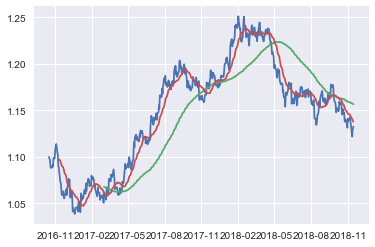

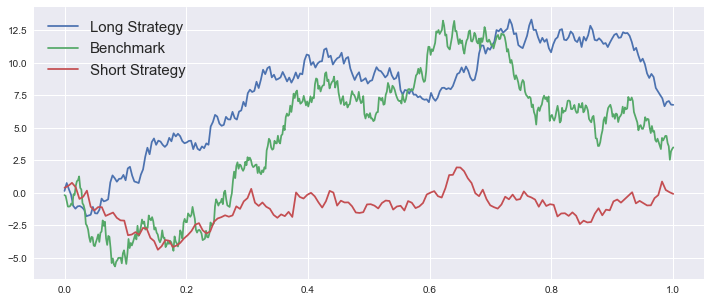

In [38]:
tester(date,close)

In [30]:
#Reading in Euro/Dollar Exchange Quotes
sp = pd.read_csv("eurcsv.csv")

#Defining Dates and Closing Prices
close = sp['Price']
date = sp['Date']


def tester(date_in,price_in):
    buys = []
    shorts = []
    rets = []
    s_rets = []
    benchmark = []
    date = pd.to_datetime(date_in)
    LMA = price_in.rolling(window=200).mean()
    SMA = price_in.rolling(window=50).mean()
    diff = SMA - LMA
    #delta_macd = macd.pct_change(periods=2)
    mix = []
    mix_port = []
    
    plt.plot(date, price_in)
    plt.plot(date, LMA)
    plt.plot(date, SMA)

    for i in range(len(price_in)-1):
        if diff[i] > 0.0:
            buys.append(i)
            mix.append(i)
            
    for i in range(len(price_in)-1):
        if diff[i] < 0.0:
            shorts.append(i)
            mix.append(i)

    for i in buys:
        j = int(i)
        j1 = int(i+1)
        returns = ((price_in[j1] - price_in[j])/price_in[j])*100
        rets.append(returns)
    for i in shorts:
        s = int(i)
        s1 = int(i+1)
        s_returns = ((price_in[s1] - price_in[s])/price_in[s])*-100
        s_rets.append(s_returns)
#    for i in mix:
#        j = int(i)
#        j1 = int(i+1)
#        mix_return = ((price_in[j1] - price_in[j])/price_in[j])*100
#        mix_port.append(mix_return)        
        
    for i in range(len(price_in)-1):
        z = int(i)
        z1 = int(i+1)
        base = ((price_in[z1] - price_in[z])/price_in[z])*100
        benchmark.append(base)
    x_bench = np.linspace(0,1,len(benchmark))
    x_strat = np.linspace(0,1,len(rets))   
    x_short = np.linspace(0,1,len(s_rets))
    fig, ax = plt.subplots(figsize=(12,5))

    ax.plot(x_strat, np.cumsum(rets),label="Long Strategy")
    ax.plot(x_bench, np.cumsum(benchmark),label="Benchmark")
    ax.plot(x_short, np.cumsum(s_rets),label="Short Strategy")
#    ax2 = ax.twinx()
#    ax2.plot(np.linspace(0,1,len(macd)), macd, 'r')
    #ax.yaxis.set_major_formatter(PercentFormatter())    
    ax.legend(fontsize=15)
    print("Strategy Return = %",sum(rets))
    print("Total Return Outright = %",sum(benchmark))
    
    #RISK ASSESMENT BENCHMARK
    delta_returns = price_in.pct_change()
    mean_returns = np.mean(delta_returns)
    std_returns = np.std(delta_returns)
    VAR_95 = norm.ppf(1-0.95,mean_returns, std_returns)*100
    print("Benchmark VAR @ confidence Level = 95% Level", VAR_95)
    
    #RISK ASSESMENT STRATEGY
    #delta_returns_strat = price_in.pct_change()
    mean_returns_strat = np.mean(rets)
    std_returns_strat = np.std(rets)
    VAR_95_strat = norm.ppf(1-0.95,mean_returns_strat, std_returns_strat)
    print("Strategy VAR @ confidence Level = 95% Level", VAR_95_strat)
    

Strategy Return = % 1.3804712082908897
Total Return Outright = % 3.4985782907569263
Benchmark VAR @ confidence Level = 95% Level -0.7523059905504526
Strategy VAR @ confidence Level = 95% Level -0.7168035420215587


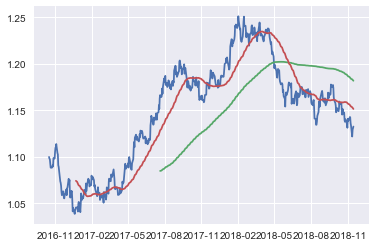

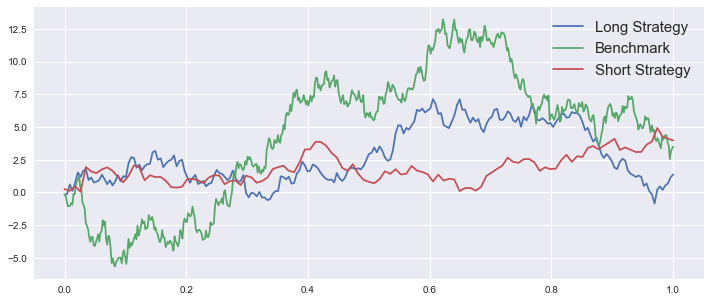

In [31]:
tester(date,close)

In [32]:
#Reading in Euro/Dollar Exchange Quotes
sp = pd.read_csv("eurcsv.csv")

#Defining Dates and Closing Prices
close = sp['Price']
date = sp['Date']


def tester(date_in,price_in):
    buys = []
    shorts = []
    rets = []
    s_rets = []
    benchmark = []
    date = pd.to_datetime(date_in)
    LMA = price_in.rolling(window=150).mean()
    SMA = price_in.rolling(window=20).mean()
    diff = SMA - LMA
    #delta_macd = macd.pct_change(periods=2)
    mix = []
    mix_port = []
    
    plt.plot(date, price_in)
    plt.plot(date, LMA)
    plt.plot(date, SMA)

    for i in range(len(price_in)-1):
        if diff[i] > 0.0:
            buys.append(i)
            mix.append(i)
            
    for i in range(len(price_in)-1):
        if diff[i] < 0.0:
            shorts.append(i)
            mix.append(i)

    for i in buys:
        j = int(i)
        j1 = int(i+1)
        returns = ((price_in[j1] - price_in[j])/price_in[j])*100
        rets.append(returns)
    for i in shorts:
        s = int(i)
        s1 = int(i+1)
        s_returns = ((price_in[s1] - price_in[s])/price_in[s])*-100
        s_rets.append(s_returns)
#    for i in mix:
#        j = int(i)
#        j1 = int(i+1)
#        mix_return = ((price_in[j1] - price_in[j])/price_in[j])*100
#        mix_port.append(mix_return)        
        
    for i in range(len(price_in)-1):
        z = int(i)
        z1 = int(i+1)
        base = ((price_in[z1] - price_in[z])/price_in[z])*100
        benchmark.append(base)
    x_bench = np.linspace(0,1,len(benchmark))
    x_strat = np.linspace(0,1,len(rets))   
    x_short = np.linspace(0,1,len(s_rets))
    fig, ax = plt.subplots(figsize=(12,5))

    ax.plot(x_strat, np.cumsum(rets),label="Long Strategy")
    ax.plot(x_bench, np.cumsum(benchmark),label="Benchmark")
    ax.plot(x_short, np.cumsum(s_rets),label="Short Strategy")
#    ax2 = ax.twinx()
#    ax2.plot(np.linspace(0,1,len(macd)), macd, 'r')
    #ax.yaxis.set_major_formatter(PercentFormatter())    
    ax.legend(fontsize=15)
    print("Strategy Return = %",sum(rets))
    print("Total Return Outright = %",sum(benchmark))
    
    #RISK ASSESMENT BENCHMARK
    delta_returns = price_in.pct_change()
    mean_returns = np.mean(delta_returns)
    std_returns = np.std(delta_returns)
    VAR_95 = norm.ppf(1-0.95,mean_returns, std_returns)*100
    print("Benchmark VAR @ confidence Level = 95% Level", VAR_95)
    
    #RISK ASSESMENT STRATEGY
    #delta_returns_strat = price_in.pct_change()
    mean_returns_strat = np.mean(rets)
    std_returns_strat = np.std(rets)
    VAR_95_strat = norm.ppf(1-0.95,mean_returns_strat, std_returns_strat)
    print("Strategy VAR @ confidence Level = 95% Level", VAR_95_strat)
    

Strategy Return = % 8.231916856058758
Total Return Outright = % 3.4985782907569263
Benchmark VAR @ confidence Level = 95% Level -0.7523059905504526
Strategy VAR @ confidence Level = 95% Level -0.7008931554923626


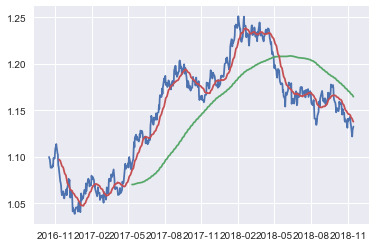

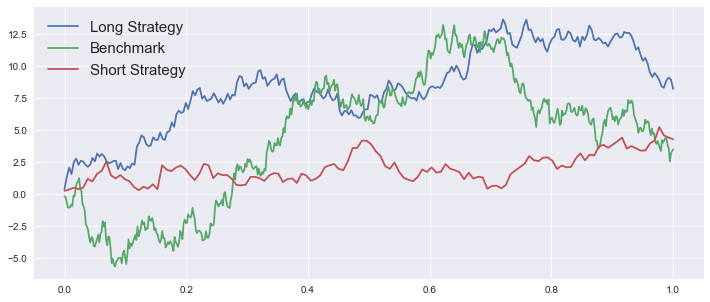

In [33]:
tester(date,close)

# SMA/LMA Analysis for AAPL (Stock)/Quandl

In [26]:
import quandl

In [ ]:
quandl.ApiConfig.api_key = "NbXifkuiz3ymhZj7V8-E"

In [ ]:

#sandp = quandl.get("WIKI/AAPL", start_date="2016-10-17", end_date="2018-11-15")

In [66]:
aapl = quandl.get("WIKI/AAPL", start_date="2016-10-17", end_date="2018-11-15")

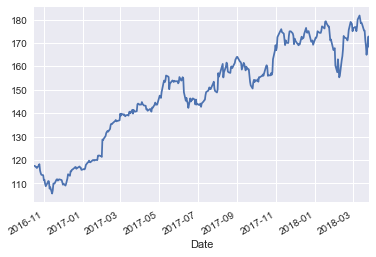

In [67]:
aapl['Close'].plot(grid=True)

In [68]:
aapl

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-10-17,117.330,117.840,116.7800,117.550,23624896.0,0.00,1.0,115.282505,115.783606,114.742103,115.498666,23624896.0
2016-10-18,118.180,118.210,117.4500,117.470,24553478.0,0.00,1.0,116.117672,116.147149,115.400411,115.420062,24553478.0
2016-10-19,117.250,117.760,113.8000,117.120,20034594.0,0.00,1.0,115.203902,115.705002,111.814107,115.076170,20034594.0
2016-10-20,116.860,117.380,116.3300,117.060,24125801.0,0.00,1.0,114.820707,115.331633,114.299956,115.017217,24125801.0
2016-10-21,116.810,116.910,116.2800,116.600,23192665.0,0.00,1.0,114.771580,114.869835,114.250829,114.565244,23192665.0
2016-10-24,117.100,117.740,117.0000,117.650,23538673.0,0.00,1.0,115.056519,115.685351,114.958264,115.596921,23538673.0
2016-10-25,117.950,118.360,117.3100,118.250,48128970.0,0.00,1.0,115.891686,116.294531,115.262854,116.186451,48128970.0
2016-10-26,114.310,115.700,113.3100,115.590,66134219.0,0.00,1.0,112.315207,113.680950,111.332657,113.572870,66134219.0
2016-10-27,115.390,115.860,114.1000,114.480,34562045.0,0.00,1.0,113.376360,113.838158,112.108871,112.482240,34562045.0


In [69]:
aapl = aapl.reset_index()

In [76]:
#Reading in Euro/Dollar Exchange Quotes
#Defining Dates and Closing Prices

close = aapl['Close']
date = aapl['Date']

def tester(date_in,price_in):
    buys = []
    shorts = []
    rets = []
    s_rets = []
    benchmark = []
    date = pd.to_datetime(date_in)
    LMA = price_in.rolling(window=20).mean()
    SMA = price_in.rolling(window=10).mean()
    diff = SMA - LMA
    #delta_macd = macd.pct_change(periods=2)
    mix = []
    mix_port = []
    
    plt.plot(date, price_in)
    plt.plot(date, LMA)
    plt.plot(date, SMA)

    for i in range(len(price_in)-1):
        if diff[i] > 0.0:
            buys.append(i)
            mix.append(i)
            
    for i in range(len(price_in)-1):
        if diff[i] < 0.0:
            shorts.append(i)
            mix.append(i)

    for i in buys:
        j = int(i)
        j1 = int(i+1)
        returns = ((price_in[j1] - price_in[j])/price_in[j])*100
        rets.append(returns)
    for i in shorts:
        s = int(i)
        s1 = int(i+1)
        s_returns = ((price_in[s1] - price_in[s])/price_in[s])*-100
        s_rets.append(s_returns)
#    for i in mix:
#        j = int(i)
#        j1 = int(i+1)
#        mix_return = ((price_in[j1] - price_in[j])/price_in[j])*100
#        mix_port.append(mix_return)        
        
    for i in range(len(price_in)-1):
        z = int(i)
        z1 = int(i+1)
        base = ((price_in[z1] - price_in[z])/price_in[z])*100
        benchmark.append(base)
    x_bench = np.linspace(0,1,len(benchmark))
    x_strat = np.linspace(0,1,len(rets))   
    x_short = np.linspace(0,1,len(s_rets))
    fig, ax = plt.subplots(figsize=(12,5))

    ax.plot(x_strat, np.cumsum(rets),label="Long Strategy")
    ax.plot(x_bench, np.cumsum(benchmark),label="Benchmark")
    ax.plot(x_short, np.cumsum(s_rets),label="Short Strategy")
#    ax2 = ax.twinx()
#    ax2.plot(np.linspace(0,1,len(macd)), macd, 'r')
    #ax.yaxis.set_major_formatter(PercentFormatter())    
    ax.legend(fontsize=15)
    print("Strategy Return = %",sum(rets))
    print("Total Return Outright = %",sum(benchmark))
    
    #RISK ASSESMENT BENCHMARK
    delta_returns = price_in.pct_change()
    mean_returns = np.mean(delta_returns)
    std_returns = np.std(delta_returns)
    VAR_95 = norm.ppf(1-0.95,mean_returns, std_returns)*100
    print("Benchmark VAR @ confidence Level = 95% Level", VAR_95)
    
    #RISK ASSESMENT STRATEGY
    #delta_returns_strat = price_in.pct_change()
    mean_returns_strat = np.mean(rets)
    std_returns_strat = np.std(rets)
    VAR_95_strat = norm.ppf(1-0.95,mean_returns_strat, std_returns_strat)
    print("Strategy VAR @ confidence Level = 95% Level", VAR_95_strat)
    

Strategy Return = % 32.228687334110454
Total Return Outright = % 38.60076376741867
Benchmark VAR @ confidence Level = 95% Level -1.9002180421185617
Strategy VAR @ confidence Level = 95% Level -1.7301965877582903


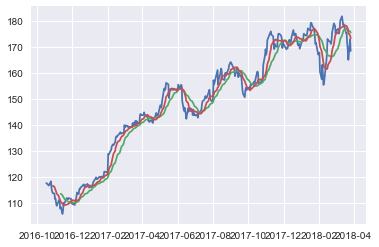

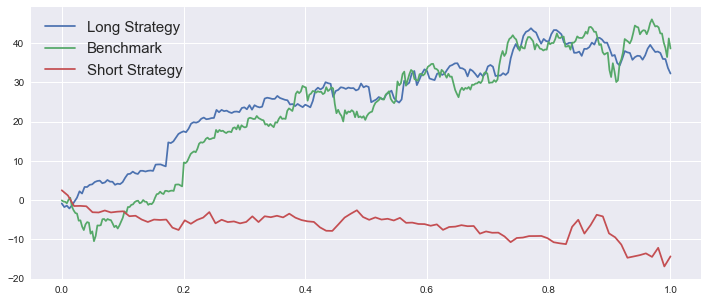

In [77]:
tester(date,close)

In [78]:
#Reading in Euro/Dollar Exchange Quotes
#Defining Dates and Closing Prices

close = aapl['Close']
date = aapl['Date']

def tester(date_in,price_in):
    buys = []
    shorts = []
    rets = []
    s_rets = []
    benchmark = []
    date = pd.to_datetime(date_in)
    LMA = price_in.rolling(window=50).mean()
    SMA = price_in.rolling(window=20).mean()
    diff = SMA - LMA
    #delta_macd = macd.pct_change(periods=2)
    mix = []
    mix_port = []
    
    plt.plot(date, price_in)
    plt.plot(date, LMA)
    plt.plot(date, SMA)

    for i in range(len(price_in)-1):
        if diff[i] > 0.0:
            buys.append(i)
            mix.append(i)
            
    for i in range(len(price_in)-1):
        if diff[i] < 0.0:
            shorts.append(i)
            mix.append(i)

    for i in buys:
        j = int(i)
        j1 = int(i+1)
        returns = ((price_in[j1] - price_in[j])/price_in[j])*100
        rets.append(returns)
    for i in shorts:
        s = int(i)
        s1 = int(i+1)
        s_returns = ((price_in[s1] - price_in[s])/price_in[s])*-100
        s_rets.append(s_returns)
#    for i in mix:
#        j = int(i)
#        j1 = int(i+1)
#        mix_return = ((price_in[j1] - price_in[j])/price_in[j])*100
#        mix_port.append(mix_return)        
        
    for i in range(len(price_in)-1):
        z = int(i)
        z1 = int(i+1)
        base = ((price_in[z1] - price_in[z])/price_in[z])*100
        benchmark.append(base)
    x_bench = np.linspace(0,1,len(benchmark))
    x_strat = np.linspace(0,1,len(rets))   
    x_short = np.linspace(0,1,len(s_rets))
    fig, ax = plt.subplots(figsize=(12,5))

    ax.plot(x_strat, np.cumsum(rets),label="Long Strategy")
    ax.plot(x_bench, np.cumsum(benchmark),label="Benchmark")
    ax.plot(x_short, np.cumsum(s_rets),label="Short Strategy")
#    ax2 = ax.twinx()
#    ax2.plot(np.linspace(0,1,len(macd)), macd, 'r')
    #ax.yaxis.set_major_formatter(PercentFormatter())    
    ax.legend(fontsize=15)
    print("Strategy Return = %",sum(rets))
    print("Total Return Outright = %",sum(benchmark))
    
    #RISK ASSESMENT BENCHMARK
    delta_returns = price_in.pct_change()
    mean_returns = np.mean(delta_returns)
    std_returns = np.std(delta_returns)
    VAR_95 = norm.ppf(1-0.95,mean_returns, std_returns)*100
    print("Benchmark VAR @ confidence Level = 95% Level", VAR_95)
    
    #RISK ASSESMENT STRATEGY
    #delta_returns_strat = price_in.pct_change()
    mean_returns_strat = np.mean(rets)
    std_returns_strat = np.std(rets)
    VAR_95_strat = norm.ppf(1-0.95,mean_returns_strat, std_returns_strat)
    print("Strategy VAR @ confidence Level = 95% Level", VAR_95_strat)
    

Strategy Return = % 12.6450644171945
Total Return Outright = % 38.60076376741867
Benchmark VAR @ confidence Level = 95% Level -1.9002180421185617
Strategy VAR @ confidence Level = 95% Level -1.9222757673534994


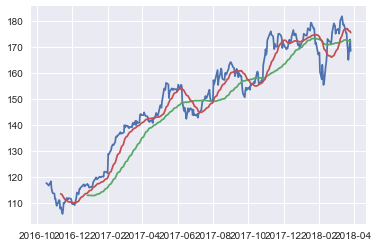

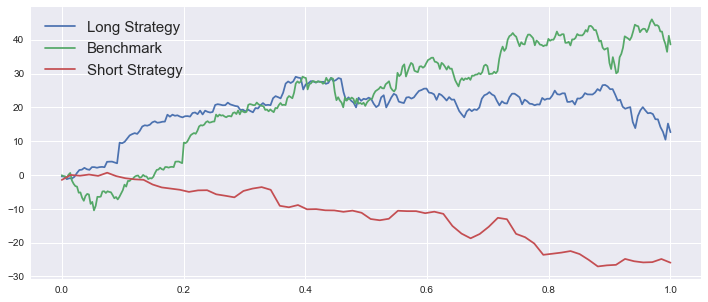

In [79]:
tester(date,close)